In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras 
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten , BatchNormalization
from keras.layers import Conv2D, MaxPooling2D , AveragePooling2D,GlobalAveragePooling2D
from keras import models, layers
from keras.layers import LSTM,TimeDistributed
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
import tensorflow
from tensorflow import keras
from keras import layers, models
from sklearn.metrics import accuracy_score

In [2]:
train_path = "/Users/phongminh/IE103Lab/Data_Malware/Data_Train"
val_path = "/Users/phongminh/IE103Lab/Data_Malware/Data_Val"
test_path = "/Users/phongminh/IE103Lab/Data_Malware/Data_Test"

In [3]:
img_size = (224, 224)
batch_size = 64

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    seed=123,
    shuffle=True,
    image_size=img_size,
    batch_size=batch_size
)

Found 2582 files belonging to 2 classes.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_path,
    seed=123,
    shuffle=True,
    image_size=img_size,
    batch_size=batch_size
)

Found 310 files belonging to 2 classes.


In [6]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    seed=123,
    shuffle=True,
    image_size=img_size,
    batch_size=batch_size
)

Found 310 files belonging to 2 classes.


In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=img_size,
                                                    batch_size=batch_size,
                                                    class_mode="binary")

test_generator = test_datagen.flow_from_directory(test_path,
                                                    target_size=img_size,
                                                    batch_size=batch_size,
                                                    class_mode="binary")

val_generator = val_datagen.flow_from_directory(test_path,
                                                  target_size=img_size,
                                                  batch_size=batch_size,
                                                 class_mode="binary")

Found 2582 images belonging to 2 classes.
Found 310 images belonging to 2 classes.
Found 310 images belonging to 2 classes.


In [8]:
input_shape = (img_size[0], img_size[1], 3)
print(input_shape)

(224, 224, 3)


In [9]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

# Loading VGG16 model
vgg_model = VGG16(weights="imagenet", include_top=False, input_shape=input_shape)

for layer in vgg_model.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 6s 0us/step


In [10]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(256, activation='relu')
dense_layer_2 = layers.Dropout(0.5)
prediction_layer = layers.Dense(1, activation='sigmoid')


model = models.Sequential([
    vgg_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [12]:
optimizer = keras.optimizers.Adam(lr=0.001)

model.compile(
    optimizer = optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True, verbose = 0)

In [13]:
epochs = 50

vgg16_history = model.fit_generator(train_generator,
				    steps_per_epoch = train_generator.samples // batch_size,
				    validation_data = val_generator, 
				    validation_steps = val_generator.samples // batch_size,
					epochs=epochs,
          callbacks=[es])

/var/folders/r4/2r984bwd7wv1_8f6pgq4mfpc0000gn/T/ipykernel_8387/4035141830.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  vgg16_history = model.fit_generator(train_generator,


Epoch 1/50


2023-05-28 16:48:09.853110: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


40/40 [==============================] - ETA: 0s - loss: 0.9376 - accuracy: 0.5675 

2023-05-28 16:58:53.726257: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


40/40 [==============================] - 707s 18s/step - loss: 0.9376 - accuracy: 0.5675 - val_loss: 0.6548 - val_accuracy: 0.5625
Epoch 2/50
40/40 [==============================] - 717s 18s/step - loss: 0.6551 - accuracy: 0.6044 - val_loss: 0.6530 - val_accuracy: 0.5977
Epoch 3/50
40/40 [==============================] - 701s 18s/step - loss: 0.6345 - accuracy: 0.6239 - val_loss: 0.6303 - val_accuracy: 0.6328
Epoch 4/50
40/40 [==============================] - 705s 18s/step - loss: 0.6360 - accuracy: 0.6366 - val_loss: 0.6267 - val_accuracy: 0.6289
Epoch 5/50
40/40 [==============================] - 684s 17s/step - loss: 0.6175 - accuracy: 0.6390 - val_loss: 0.6196 - val_accuracy: 0.6211
Epoch 6/50
40/40 [==============================] - 684s 17s/step - loss: 0.6219 - accuracy: 0.6350 - val_loss: 0.6155 - val_accuracy: 0.6602
Epoch 7/50
40/40 [==============================] - 714s 18s/step - loss: 0.6193 - accuracy: 0.6346 - val_loss: 0.6294 - val_accuracy: 0.6211
Epoch 8/50
40/40 

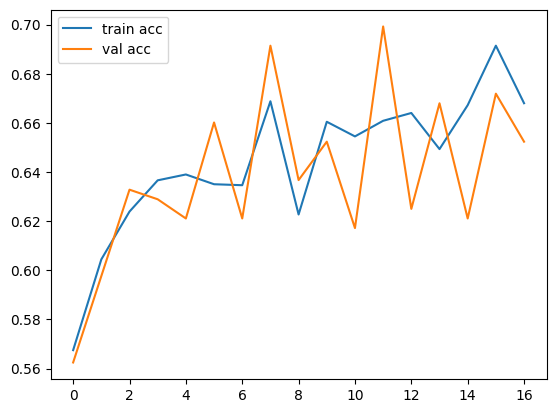

In [15]:
plt.plot(vgg16_history.history['accuracy'], label='train acc')
plt.plot(vgg16_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.close()

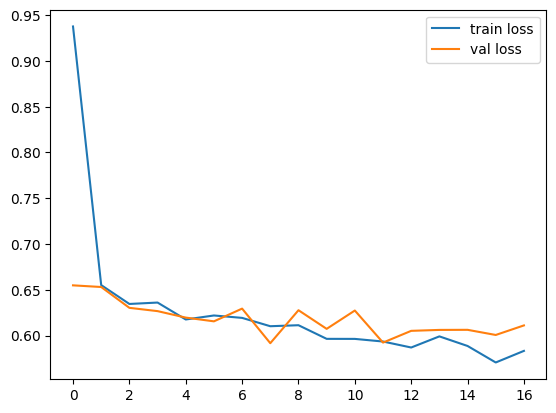

In [16]:
plt.plot(vgg16_history.history['loss'], label='train loss')
plt.plot(vgg16_history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.close()

In [17]:
from sklearn.metrics import classification_report

y_pred = model.predict(test_generator)
y_pred_labels = np.round(y_pred).astype(int)
y_true = np.concatenate([y for _, y in test_ds], axis=0)
report = classification_report(y_true, y_pred_labels)

print(report)

2023-05-28 20:19:18.399871: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


5/5 [==============================] - 81s 17s/step
              precision    recall  f1-score   support

           0       0.47      0.47      0.47       150
           1       0.51      0.51      0.51       160

    accuracy                           0.49       310
   macro avg       0.49      0.49      0.49       310
weighted avg       0.49      0.49      0.49       310



2023-05-28 20:20:39.874250: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [310]
	 [[{{node Placeholder/_4}}]]
2023-05-28 20:20:39.874678: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [310]
	 [[{{node Placeholder/_0}}]]


In [18]:
from sklearn.metrics import accuracy_score, f1_score
accuracy = accuracy_score(y_true, y_pred_labels)
f1 = f1_score(y_true, y_pred_labels, average='weighted')

In [19]:
print('Accuracy:', accuracy)
print('F1-Score:', f1)

Accuracy: 0.49032258064516127
F1-Score: 0.49019510286300577


In [ ]:
vgg16_model_name = 'vgg16_model.h5'
model.save(vgg16_model_name)